# Decision Tree with Python

** Importing needed packages **

In [1]:
import warnings
warnings.filterwarnings("ignore")

% matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
colors = plt.rcParams['axes.color_cycle'][1], plt.rcParams['axes.color_cycle'][4]

import pandas

** Loading data, generated locally for example 'John plays tennis?' **

In [2]:
dataset = pandas.read_csv("Iris.csv")
dataset.drop(columns=['Id'], inplace =True)
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


** Train / Test set split: Dividing sub-set of test and training **

In [3]:
from sklearn.cross_validation import train_test_split
train, test = train_test_split(dataset, train_size = 0.7)

feature_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

/home/iss-user/anaconda3/envs/iss-env-py3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Decision Tree Training (machine learning) Process#

In [4]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
dt = DecisionTreeClassifier(criterion='entropy') # ID3 Algorithm: Information Gain
# dt = DecisionTreeClassifier(max_depth=3, criterion='entropy') # ID3 Algorithm: Information Gain
# dt = DecisionTreeClassifier(max_depth=3, criterion='gini') # Gini Index
decision_tree_binary_classifier = dt.fit(train[feature_cols], 
                                         train['Species'])

** Display generated tree **

In [5]:
!pip install pydotplus

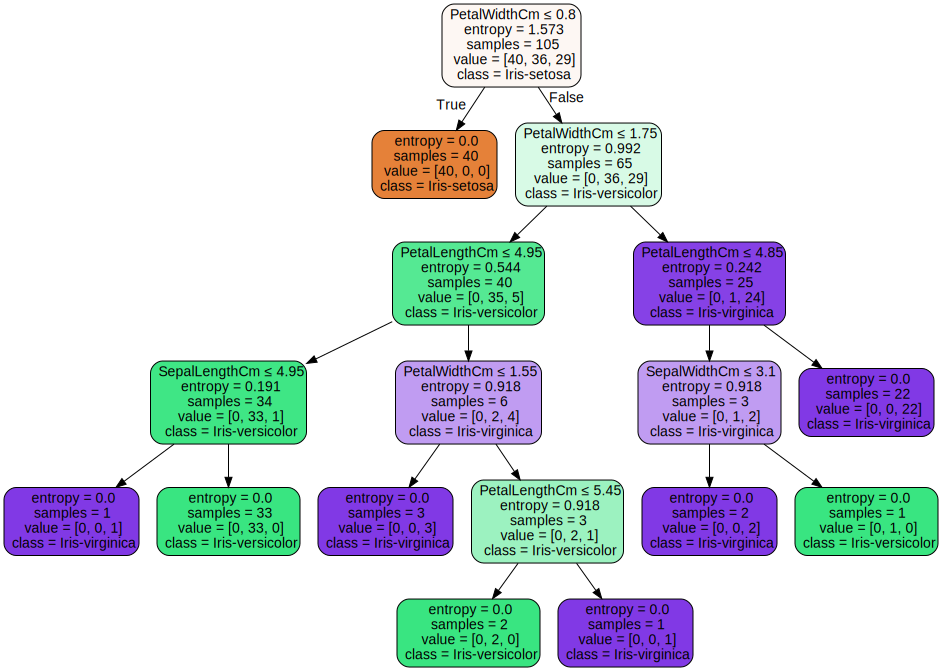

In [6]:
from IPython.display import SVG
import numpy as np
import pydotplus
from sklearn.externals.six import StringIO
dot_data = StringIO()
export_graphviz(
    decision_tree_binary_classifier,
    out_file=dot_data,  
    feature_names=np.array(feature_cols),
    class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
    filled=True,
    rounded=True,  
    special_characters=True
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
SVG(graph.create(format='svg'))

** Confusion Matrix **

Confusion matrix
[[10  0  0]
 [ 0 13  1]
 [ 0  0 21]]


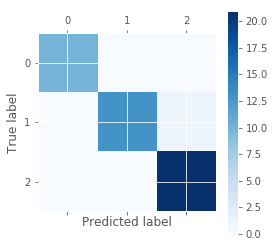

In [7]:
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix
test_output = decision_tree_binary_classifier.predict(test[feature_cols])
cm = confusion_matrix(test['Species'], test_output)

print('Confusion matrix')
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(16, 16))
plt.matshow(cm, cmap=plt.get_cmap('Blues'))
# plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

** Classifier Performance **

In [8]:
report = classification_report(
    test['Species'],
    test_output,
    target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.95      1.00      0.98        21

    avg / total       0.98      0.98      0.98        45



---